<h1>Activity 3: Dengue Data Analytics Project<h1>
<h2>Analyst : Mery Rose Cablaida</h2>
    

In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [10]:
dengue = pd.read_csv('datasets//dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [11]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [12]:
dengue['Month']= dengue['Month'].astype('category')
dengue['Region']= dengue['Region'].astype('category')
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [13]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>EXPLANATORY DATA ANALYTICS</h1>

<h2>1) Which month has the highest average dengue cases?<h2>

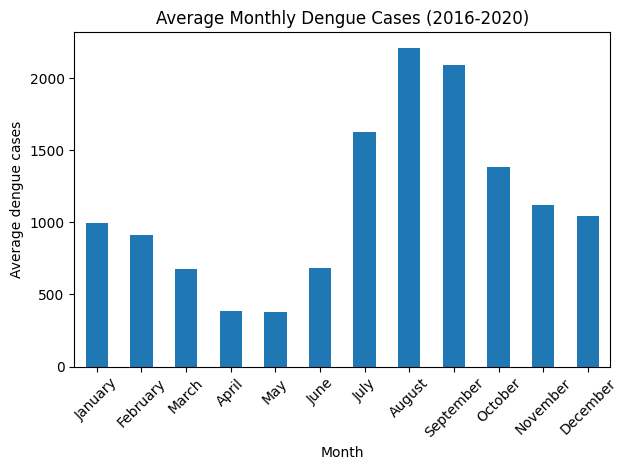

In [15]:

monthly = dengue.groupby('Month')['Dengue_Cases'].mean()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly = monthly.reindex(month_order)
monthly.plot(kind='bar')
plt.ylabel('Average dengue cases')
plt.title('Average Monthly Dengue Cases (2016-2020)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Dengue cases in the Philippines peak in August–September because the wet, warm, and humid conditions of the monsoon season create ideal breeding and transmission environments for Aedes mosquitoes (mosquitoes that causes dengue).During wet months, people spend more time indoors, yet, according to the World Health Organization (WHO) Western Pacific Regional Office, Dengue Situation Update Philippines, 2019, dengue mosquitoes are daytime, indoor biters. This increases transmission opportunities inside homes and schools, especially in densely populated areas. This implies that dengue outbreaks are seasonal, predictable, and largely preventable through timely vector control, early warning systems, and community cleanup campaigns.</h3>

<h2>2) Which year had the highest total dengue cases (2016–2020)?</h2>

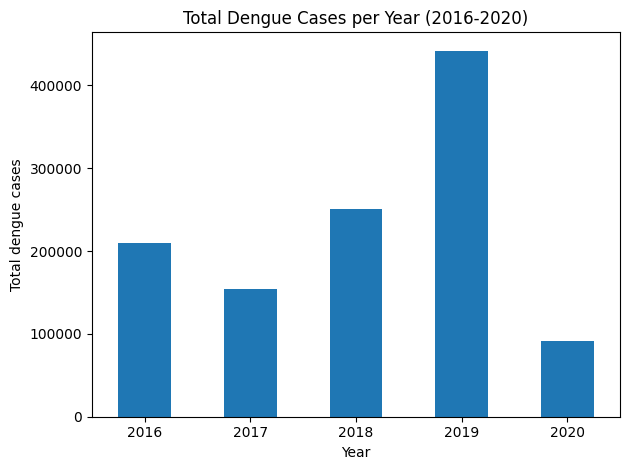

In [19]:
yearly = dengue.groupby('Year')['Dengue_Cases'].sum()
yearly.plot(kind='bar')
plt.ylabel('Total dengue cases')
plt.title('Total Dengue Cases per Year (2016-2020)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<h3>The year 2019 marked the peak of dengue incidence and deaths in the Philippines between 2016 and 2020, with over 420,000 cases and more than 1,500 fatalities (DOH, 2019; PNA, 2019). This surge followed the suspension of the Dengvaxia vaccine program in late 2017 after Sanofi Pasteur revealed that the vaccine could increase the risk of severe dengue in individuals without prior infection (WHO, 2018; PNA, 2017). The resulting public mistrust and vaccine hesitancy weakened the country’s immunization efforts and delayed healthcare-seeking behavior (Larson et al., 2019). Combined with favorable climatic conditions and dengue’s natural 3–4-year transmission cycle, these factors contributed to the 2019 outbreak (PAGASA, 2019; DOH Epidemiology Bureau, 2020). This implies that public trust and effective communication are as crucial as medical interventions themselves. The Dengvaxia controversy demonstrated how misinformation and loss of confidence can undermine public health efforts. Hence, maintaining transparency, scientific integrity, and strong community engagement is essential to prevent similar large-scale epidemics in the future.</h3>

<h2>3. Which region consistently recorded the highest dengue cases?</h2>

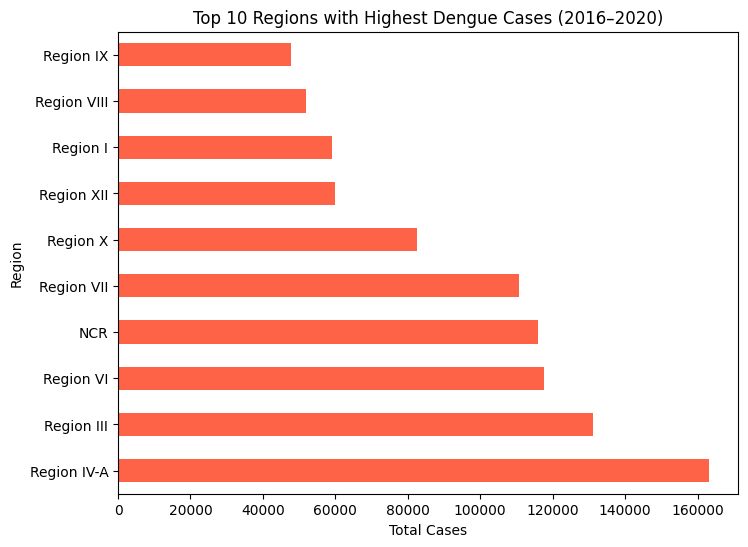

In [22]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False).head(10)
region_cases.plot(kind="barh", color="tomato", figsize=(8,6))
plt.title("Top 10 Regions with Highest Dengue Cases (2016–2020)")
plt.xlabel("Total Cases")
plt.ylabel("Region")
plt.show()


<h3>Region 4A (Calabarzon) consistently recorded the highest dengue cases from 2016–2020, largely due to its high population density, rapid urbanization, and warm, humid climate that favor mosquito breeding (DOH, 2019; SunStar, 2024). Its proximity to Metro Manila and heavy human mobility further increased transmission risks, while frequent rainfall, poor drainage, and inadequate waste management created ideal mosquito habitats (Inquirer, 2024). Although better disease surveillance may contribute to higher reported numbers, it reflects a genuinely elevated burden caused by environmental and infrastructural challenges (PNA, 2019). This result implies that rapid urban growth without adequate public health planning intensifies vulnerability to dengue outbreaks, emphasizing the need for sustained vector control, improved sanitation, effective drainage systems, and stronger community participation to reduce cases in highly urbanized regions.</h3>

<h2>4. Which year had the highest number of dengue-related deaths?</h2>

Region
NCR            4008
Region XII     2796
Region VI      1825
Region VII     1760
CAR            1008
Region XIII     966
Region X        848
Region IV-A     652
Region VIII     585
Region IX       532
Region III      482
Region XI       385
BARMM           332
Region II       193
Region V        185
Region I        157
Region IV-B     130
Name: Dengue_Deaths, dtype: int64


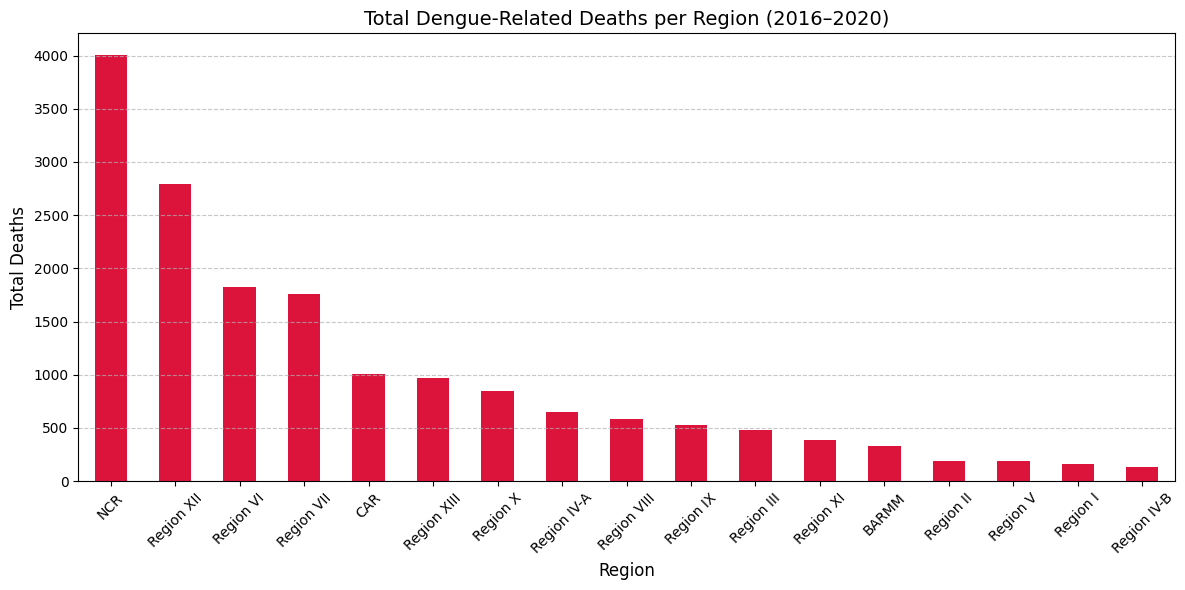

In [28]:
region_deaths = dengue.groupby("Region")["Dengue_Deaths"].sum().sort_values(ascending=False)

print(region_deaths)

plt.figure(figsize=(12,6))
region_deaths.plot(kind='bar', color='crimson')
plt.title("Total Dengue-Related Deaths per Region (2016–2020)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Although CALABARZON (Region 4A) recorded the highest number of dengue cases from 2016 to 2020, it maintained a lower death toll compared to the National Capital Region (NCR). This suggests that while transmission was widespread, effective healthcare response and decentralized hospital systems across its five provinces (Cavite, Laguna, Batangas, Rizal, and Quezon) helped prevent more fatalities (DOH Epidemiology Bureau, 2020). The region’s semi-urban and rural mix may have reduced overcrowding in hospitals and allowed local government units to respond quickly through community-based vector control and early treatment campaigns. In contrast, NCR’s dense urban population, limited hospital capacity, and delays in seeking medical care during outbreaks likely contributed to higher death rates (PNA, 2023; Philstar, 2024). This indicates that decentralized healthcare systems and proactive local coordination can mitigate the fatal impact of large-scale dengue outbreaks, even in regions with high infection rates.</h3>

<h2>5. What is the overall trend of dengue cases over the years?</h2>

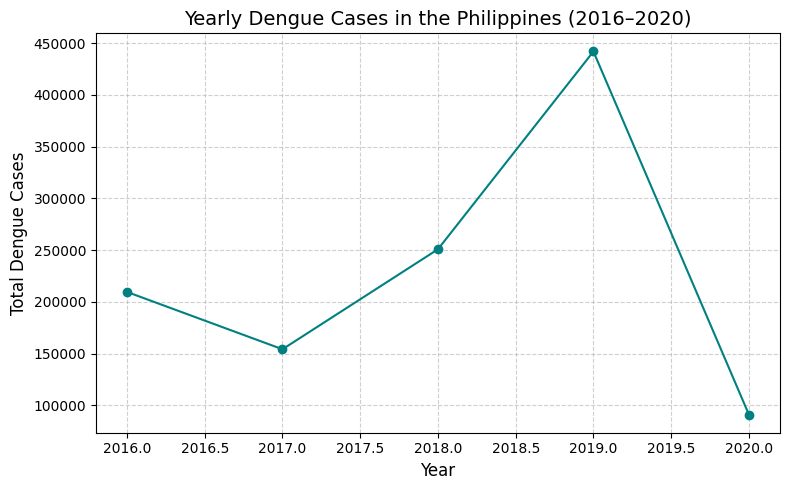

In [38]:
yearly_cases = dengue.groupby("Year")["Dengue_Cases"].sum().reset_index()
yearly_cases

plt.figure(figsize=(8,5))
plt.plot(yearly_cases["Year"], yearly_cases["Dengue_Cases"], marker='o', linestyle='-', color='teal')
plt.title("Yearly Dengue Cases in the Philippines (2016–2020)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Dengue Cases", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h3>The year 2019 marked the peak of dengue cases in the Philippines, with over 420,000 infections and more than 1,500 deaths, leading the Department of Health (DOH) to declare a national dengue epidemic (DOH, 2020; GMA News, 2019). This surge was driven by favorable weather conditions, a natural 3–4-year dengue cycle, and the lingering effects of the Dengvaxia vaccine controversy, which reduced public trust and weakened preventive measures (WHO, 2019; Wired, 2019). Additionally, rapid urbanization and poor waste management facilitated mosquito breeding (Philstar, 2019). This implies that public health crises can intensify when environmental factors align with social distrust, highlighting the importance of sustained health education, climate-sensitive disease monitoring, and community-based vector control to prevent future outbreaks.</h3>

<h2>6. Which regions had the most dengue deaths relative to their cases?</h2>

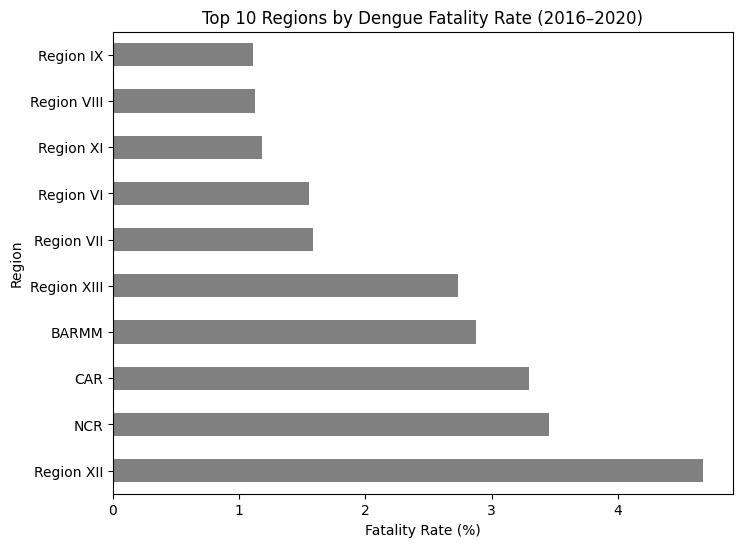

In [39]:
region_fatality = dengue.groupby("Region")[["Dengue_Cases","Dengue_Deaths"]].sum()
region_fatality["Fatality_Rate"] = (region_fatality["Dengue_Deaths"] / region_fatality["Dengue_Cases"]) * 100
region_fatality["Fatality_Rate"].sort_values(ascending=False).head(10).plot(kind="barh", color="gray", figsize=(8,6))
plt.title("Top 10 Regions by Dengue Fatality Rate (2016–2020)")
plt.xlabel("Fatality Rate (%)")
plt.ylabel("Region")
plt.show()


<h3>The analysis reveals that Region XII (SOCCSKSARGEN) recorded the highest dengue death rate relative to its number of cases from 2016–2020. This suggests that while the region may not have had the largest number of infections, its case fatality ratio was disproportionately high—indicating possible gaps in healthcare accessibility, late diagnosis, and limited public awareness of early dengue symptoms (DOH, 2020; WHO, 2019). Socioeconomic factors, such as rural community distribution and fewer tertiary hospitals, may have also contributed to delays in treatment and higher mortality rates (Philippine News Agency, 2019). This result implicates an urgent need for strengthened healthcare infrastructure, early detection campaigns, and community education programs in lower-resource regions to ensure timely medical intervention and reduce dengue-related deaths.</h3>

<h2>7. How does the trend of dengue cases change by region over time?</h2>

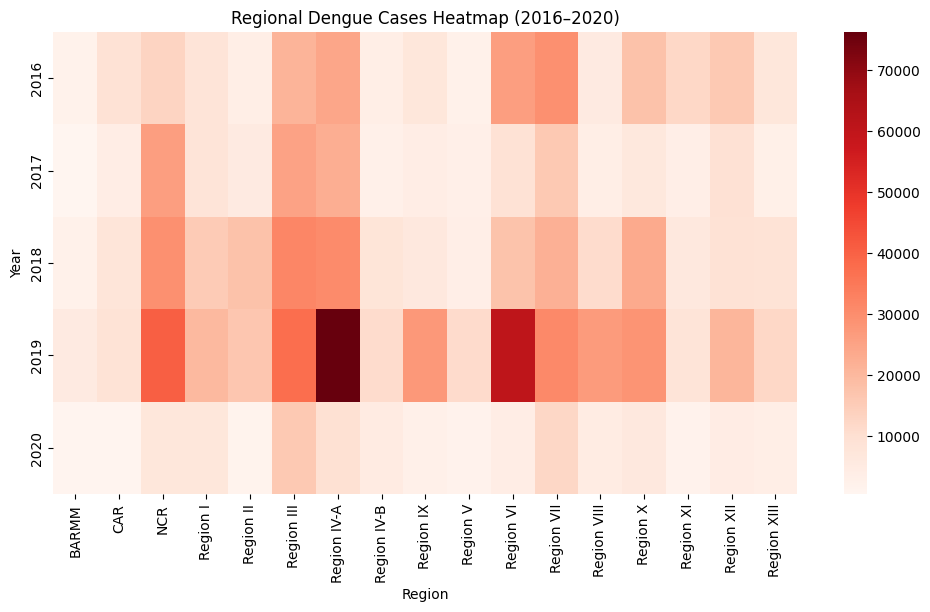

In [40]:
pivot = dengue.pivot_table(values="Dengue_Cases", index="Year", columns="Region", aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Reds")
plt.title("Regional Dengue Cases Heatmap (2016–2020)")
plt.show()

<h3>The heatmap shows that 2019 experienced the most intense dengue outbreaks across almost all regions, with particularly high concentrations in Region IV-A (Calabarzon), Region VI (Western Visayas), and Region VII (Central Visayas). This pattern aligns with the nationwide dengue epidemic declared by the Department of Health (DOH) that year due to widespread transmission (DOH, 2019). The consistent rise leading up to 2019 reflects how climatic factors (heavy rainfall and humidity) and urban density amplified mosquito breeding across diverse areas (WHO, 2019). After 2019, cases visibly declined in 2020, likely due to COVID-19 mobility restrictions and improved sanitation efforts that inadvertently reduced mosquito exposure (PNA, 2020). This implies that environmental management, community behavior, and mobility patterns play major roles in shaping dengue trends, underscoring the importance of integrated disease surveillance and prevention strategies across regions.</h3>

<h2>8. How did the 2020 lockdown affect dengue cases compared to 2019?</h2>

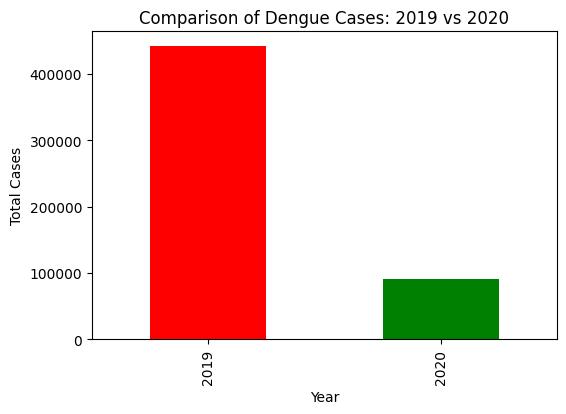

In [42]:
comparison = dengue[dengue["Year"].isin([2019,2020])].groupby("Year")["Dengue_Cases"].sum()
comparison.plot(kind="bar", color=["red","green"], figsize=(6,4))
plt.title("Comparison of Dengue Cases: 2019 vs 2020")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.show()


<h3>The bar graph clearly shows a drastic decline in dengue cases from 2019 to 2020 from over 420,000 cases in 2019 to fewer than 100,000 in 2020 (DOH, 2020). This sharp drop reflects the combined effects of COVID-19 lockdown measures, which restricted movement, improved household sanitation, and reduced exposure to mosquito breeding sites (PNA, 2020; WHO, 2021). Additionally, increased health awareness and community clean-up campaigns during the pandemic may have indirectly curbed dengue transmission. This trend implies that behavioral and environmental interventions even those not directly targeting dengue can significantly reduce its incidence, highlighting the importance of consistent hygiene practices, vector control, and public engagement in managing mosquito-borne diseases beyond pandemic contexts.</h3>

<h2>9. Which months tend to have the most dengue deaths?</h2>

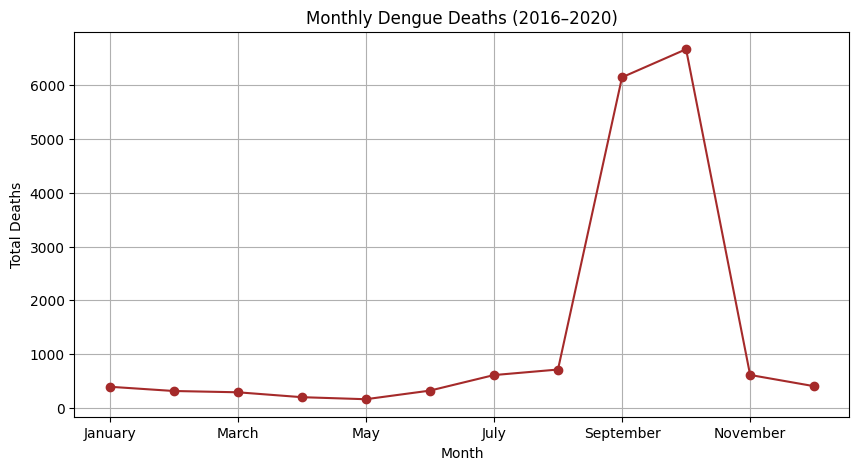

In [43]:
monthly_deaths = dengue.groupby("Month")["Dengue_Deaths"].sum().reindex([
    "January","February","March","April","May","June","July","August","September","October","November","December"])
monthly_deaths.plot(kind="line", marker='o', color='brown', figsize=(10,5))
plt.title("Monthly Dengue Deaths (2016–2020)")
plt.xlabel("Month")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()


<h3>The line graph shows that dengue-related deaths in the Philippines sharply increased from July to September, peaking around August and September during the years 2016–2020. This trend aligns with the country’s rainy season, which creates ideal breeding conditions for Aedes aegypti mosquitoes the primary dengue vector (DOH, 2020; WHO, 2019). The spike in deaths also suggests that delayed treatment-seeking behaviors and overwhelmed healthcare facilities may occur during outbreak peaks, leading to higher mortality. This implies that public health responses and hospital preparedness must intensify before and during the rainy months, focusing on early detection, community education, and preemptive vector control to minimize fatal outcomes during dengue’s seasonal surge.</h3>

<h2>10. Is there a correlation between dengue cases and deaths?</h2>

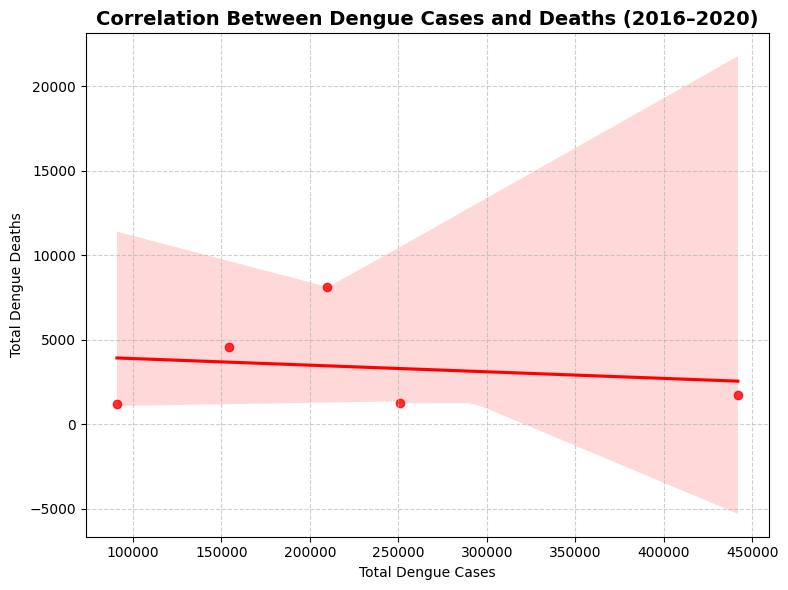

Correlation Coefficient between Dengue Cases and Deaths: -0.17


In [47]:
correlation_data = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()

plt.figure(figsize=(8,6))
sns.regplot(x="Dengue_Cases", y="Dengue_Deaths", data=correlation_data, color="red", marker="o")
plt.title("Correlation Between Dengue Cases and Deaths (2016–2020)", fontsize=14, fontweight='bold')
plt.xlabel("Total Dengue Cases")
plt.ylabel("Total Dengue Deaths")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

corr_value = correlation_data["Dengue_Cases"].corr(correlation_data["Dengue_Deaths"])
print(f"Correlation Coefficient between Dengue Cases and Deaths: {corr_value:.2f}")

<h3>The scatter plot shows a weak negative correlation (r = -0.17) between dengue cases and dengue deaths in the Philippines from 2016–2020. This means that even as dengue cases increased in certain years—like the major outbreak in 2019, the number of deaths did not rise proportionally. This suggests that improvements in medical response, early diagnosis, and public awareness may have helped reduce fatality rates despite higher infection counts (DOH, 2020; WHO, 2021). It also reflects better disease surveillance and access to treatment compared to earlier years. The implication is that strengthening healthcare capacity and community education can effectively mitigate mortality even during high case surges, emphasizing the value of sustained public health preparedness and early intervention in controlling dengue-related deaths.</h3>